Load Database

In [5]:
#import file

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [6]:
#open the data
data = pd.read_csv('data.csv', encoding='latin-1')
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [8]:
#data 5 teratas
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [9]:
#check 5 terbawah
data.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [10]:
#Check shape dari data
data.shape

(13169, 13)

In [11]:
#Check duplicate
data.duplicated().sum()

125

In [12]:
# Membersihkan Duplicate

data = data.drop_duplicates()

In [13]:
#Check duplicate lagi
data.duplicated().sum()

0

In [14]:
#Check Shape lagi
data.shape

(13044, 13)

In [15]:
# Check apakah ada Missing Value

data.isna().sum()/data.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

Analisis Datanya
pada data yang disediakan terdapat 4 jenis type yang berbeda. 
pertama adalah apakah Tweet tersebut mengandung Hate Speech dan Abusive.
kedua apakah mengarah kepada individual atau grup
ketiga apakah jenis hate speech yang terjadi
ke empat apakah hate speech ini tergolong lemah, sedang, atau parah


HS & Abusive

In [16]:
data_filter1 = data[["HS","Abusive"]]
data_filter1

,HS,Abusive
0,1,1
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
13164,1,1
13165,0,1
13166,0,0
13167,0,0


In [17]:
df1 = data_filter1.loc[(data_filter1['HS'] == 1) & (data_filter1['Abusive'] == 0)].reset_index(drop=True)
df1["Label"] = 'HS'
df1

,HS,Abusive,Label
0,1,0,HS
1,1,0,HS
2,1,0,HS
3,1,0,HS
4,1,0,HS
...,...,...,...
2251,1,0,HS
2252,1,0,HS
2253,1,0,HS
2254,1,0,HS


In [18]:
df2 = data_filter1.loc[(data_filter1['HS'] == 0) & (data_filter1['Abusive'] == 1)].reset_index(drop=True)
df2["Label"] = 'Abusive'
df2

,HS,Abusive,Label
0,0,1,Abusive
1,0,1,Abusive
2,0,1,Abusive
3,0,1,Abusive
4,0,1,Abusive
...,...,...,...
1738,0,1,Abusive
1739,0,1,Abusive
1740,0,1,Abusive
1741,0,1,Abusive


In [19]:
df3 = data_filter1.loc[(data_filter1['HS'] == 1) & (data_filter1['Abusive'] == 1)].reset_index(drop=True)
df3["Label"] = 'Abusive and HS'
df3

,HS,Abusive,Label
0,1,1,Abusive and HS
1,1,1,Abusive and HS
2,1,1,Abusive and HS
3,1,1,Abusive and HS
4,1,1,Abusive and HS
...,...,...,...
3257,1,1,Abusive and HS
3258,1,1,Abusive and HS
3259,1,1,Abusive and HS
3260,1,1,Abusive and HS


In [20]:
df4 = data_filter1.loc[(data_filter1['HS'] == 0) & (data_filter1['Abusive'] == 0)].reset_index(drop=True)
df4["Label"] = 'None'
df4

,HS,Abusive,Label
0,0,0,None
1,0,0,None
2,0,0,None
3,0,0,None
4,0,0,None
...,...,...,...
5778,0,0,None
5779,0,0,None
5780,0,0,None
5781,0,0,None


In [21]:
datafix = pd.concat([df1,df2,df3,df4])
datafix.value_counts(subset="Label")

Label
None              5783
Abusive and HS    3262
HS                2256
Abusive           1743
dtype: int64

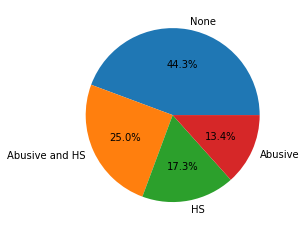

In [22]:
plt.pie(datafix.value_counts(subset="Label"),labels=datafix.value_counts(subset="Label").index, autopct='%1.1f%%')
plt.show()

Group or Individual?

In [23]:
data_filter2 = data[["HS_Individual","HS_Group"]]
data_filter2 

,HS_Individual,HS_Group
0,1,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
13164,1,0
13165,0,0
13166,0,0
13167,0,0


In [24]:
df1 = data_filter2.loc[(data_filter2["HS_Individual"] == 1) & (data_filter2["HS_Group"] == 0)].reset_index(drop=True)
df1["Label"] = 'HS_Individual'
df1

,HS_Individual,HS_Group,Label
0,1,0,HS_Individual
1,1,0,HS_Individual
2,1,0,HS_Individual
3,1,0,HS_Individual
4,1,0,HS_Individual
...,...,...,...
3535,1,0,HS_Individual
3536,1,0,HS_Individual
3537,1,0,HS_Individual
3538,1,0,HS_Individual


In [25]:
df2 = data_filter2.loc[(data_filter2["HS_Individual"] == 0) & (data_filter2["HS_Group"] == 1)].reset_index(drop=True)
df2["Label"] = 'HS_Group'
df2

,HS_Individual,HS_Group,Label
0,0,1,HS_Group
1,0,1,HS_Group
2,0,1,HS_Group
3,0,1,HS_Group
4,0,1,HS_Group
...,...,...,...
1973,0,1,HS_Group
1974,0,1,HS_Group
1975,0,1,HS_Group
1976,0,1,HS_Group


In [26]:
df3 = data_filter2.loc[(data_filter2["HS_Individual"] == 0) & (data_filter2["HS_Group"] == 0)].reset_index(drop=True)
df3["Label"] = 'Not Both'
df3

,HS_Individual,HS_Group,Label
0,0,0,Not Both
1,0,0,Not Both
2,0,0,Not Both
3,0,0,Not Both
4,0,0,Not Both
...,...,...,...
7521,0,0,Not Both
7522,0,0,Not Both
7523,0,0,Not Both
7524,0,0,Not Both


In [27]:
datafix2 = pd.concat([df1,df2,df3])
datafix2.value_counts(subset="Label")

Label
Not Both         7526
HS_Individual    3540
HS_Group         1978
dtype: int64

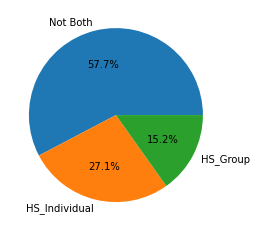

In [28]:
plt.pie(datafix2.value_counts(subset="Label"),labels=datafix2.value_counts(subset="Label").index, autopct='%1.1f%%')
plt.show()

Jenis Hate Speech

In [29]:
data_filter3 = data[["HS_Religion","HS_Race", "HS_Physical", "HS_Gender"]]
data_filter3

,HS_Religion,HS_Race,HS_Physical,HS_Gender
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0
...,...,...,...,...
13164,0,0,1,0
13165,0,0,0,0
13166,0,0,0,0
13167,0,0,0,0


In [30]:
df1 = data_filter3.loc[(data_filter3["HS_Religion"] == 1) & (data_filter3["HS_Race"] == 0) & (data_filter3["HS_Physical"] == 0) & (data_filter3["HS_Gender"] == 0) ].reset_index(drop=True)
df1["Label"] = 'HS_Religion'
df1

,HS_Religion,HS_Race,HS_Physical,HS_Gender,Label
0,1,0,0,0,HS_Religion
1,1,0,0,0,HS_Religion
2,1,0,0,0,HS_Religion
3,1,0,0,0,HS_Religion
4,1,0,0,0,HS_Religion
...,...,...,...,...,...
648,1,0,0,0,HS_Religion
649,1,0,0,0,HS_Religion
650,1,0,0,0,HS_Religion
651,1,0,0,0,HS_Religion


In [31]:
df2 = data_filter3.loc[(data_filter3["HS_Religion"] == 0) & (data_filter3["HS_Race"] == 1) & (data_filter3["HS_Physical"] == 0) & (data_filter3["HS_Gender"] == 0) ].reset_index(drop=True)
df2["Label"] = 'HS_Race'
df2

,HS_Religion,HS_Race,HS_Physical,HS_Gender,Label
0,0,1,0,0,HS_Race
1,0,1,0,0,HS_Race
2,0,1,0,0,HS_Race
3,0,1,0,0,HS_Race
4,0,1,0,0,HS_Race
...,...,...,...,...,...
459,0,1,0,0,HS_Race
460,0,1,0,0,HS_Race
461,0,1,0,0,HS_Race
462,0,1,0,0,HS_Race


In [32]:
df3 = data_filter3.loc[(data_filter3["HS_Religion"] == 0) & (data_filter3["HS_Race"] == 0) & (data_filter3["HS_Physical"] == 1) & (data_filter3["HS_Gender"] == 0) ].reset_index(drop=True)
df3["Label"] = 'HS_Physical'
df3

,HS_Religion,HS_Race,HS_Physical,HS_Gender,Label
0,0,0,1,0,HS_Physical
1,0,0,1,0,HS_Physical
2,0,0,1,0,HS_Physical
3,0,0,1,0,HS_Physical
4,0,0,1,0,HS_Physical
...,...,...,...,...,...
279,0,0,1,0,HS_Physical
280,0,0,1,0,HS_Physical
281,0,0,1,0,HS_Physical
282,0,0,1,0,HS_Physical


In [33]:
df4 = data_filter3.loc[(data_filter3["HS_Religion"] == 0) & (data_filter3["HS_Race"] == 0) & (data_filter3["HS_Physical"] == 0) & (data_filter3["HS_Gender"] == 1) ].reset_index(drop=True)
df4["Label"] = 'HS_Gender'
df4

,HS_Religion,HS_Race,HS_Physical,HS_Gender,Label
0,0,0,0,1,HS_Gender
1,0,0,0,1,HS_Gender
2,0,0,0,1,HS_Gender
3,0,0,0,1,HS_Gender
4,0,0,0,1,HS_Gender
...,...,...,...,...,...
247,0,0,0,1,HS_Gender
248,0,0,0,1,HS_Gender
249,0,0,0,1,HS_Gender
250,0,0,0,1,HS_Gender


In [34]:
df5 = data_filter3.loc[(data_filter3["HS_Religion"] == 0) & (data_filter3["HS_Race"] == 0) & (data_filter3["HS_Physical"] == 0) & (data_filter3["HS_Gender"] == 0) ].reset_index(drop=True)
df5["Label"] = 'Null'
df5

,HS_Religion,HS_Race,HS_Physical,HS_Gender,Label
0,0,0,0,0,Null
1,0,0,0,0,Null
2,0,0,0,0,Null
3,0,0,0,0,Null
4,0,0,0,0,Null
...,...,...,...,...,...
11227,0,0,0,0,Null
11228,0,0,0,0,Null
11229,0,0,0,0,Null
11230,0,0,0,0,Null


In [35]:
datafix3 = pd.concat([df1,df2,df3,df4])
datafix3.value_counts(subset="Label")

Label
HS_Religion    653
HS_Race        464
HS_Physical    284
HS_Gender      252
dtype: int64

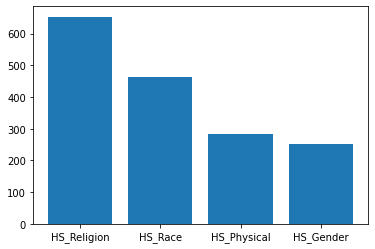

In [36]:
plt.bar(x = datafix3.value_counts(subset="Label").index, height=datafix3.value_counts(subset="Label").values)
plt.show()

In [40]:
from wordcloud import WordCloud

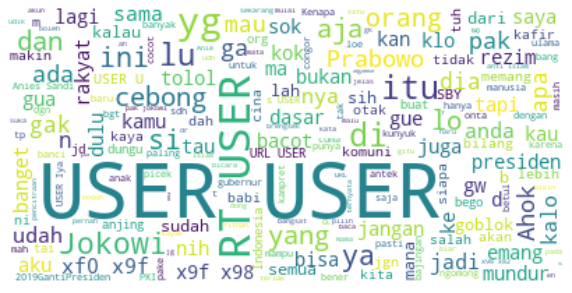

In [43]:
data_all = data[data["HS_Weak"] == 1]
WC = WordCloud(background_color = 'white').generate(data_all['Tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

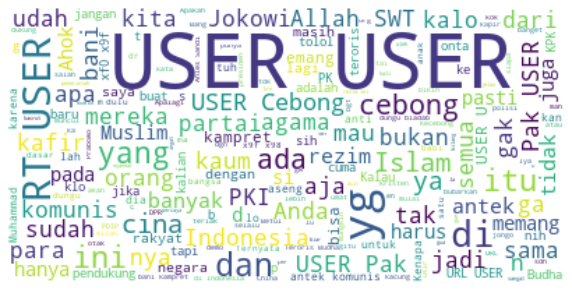

In [45]:
data_all = data[data["HS_Moderate"] == 1]
WC = WordCloud(background_color = 'white').generate(data_all['Tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

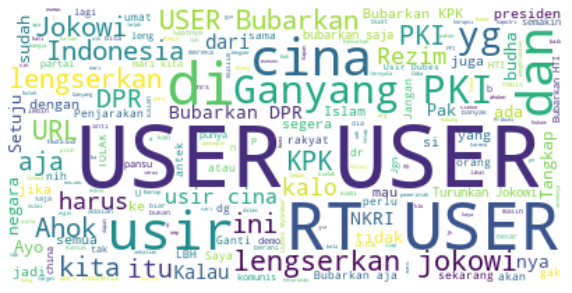

In [46]:
data_all = data[data["HS_Strong"] == 1]
WC = WordCloud(background_color = 'white').generate(data_all['Tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Conclusion:
1. Berdasarkan Pie Chart y